In [2]:
import os
os.environ['R_HOME']= 'C:\\Program Files\\R\\R-4.2.3'
os.environ['PATH'] += os.pathsep + 'C:\\Program Files\\R\\R-4.2.3\\bin\\X64\\'
os.environ['PATH'] += os.pathsep + 'C:\\Program Files\\R\\R-4.2.3\\'


import time
import threading
import rpy2.robjects as robjects

def long_r_function():
    robjects.r('Sys.sleep(10)')    # pretend we have a long-running function in R

r_thread = threading.Thread(target=long_r_function, daemon=True)
start_time = time.time()
r_thread.start()

while r_thread.is_alive():
    print("R running...")    # expect to be able to see this print from main thread, 
    time.sleep(2)            # while R does work in second thread

print("Finished after ", time.time() - start_time, " seconds")

R running...
R running...
R running...
R running...
R running...
R running...
Finished after  12.038839101791382  seconds


In [1]:
import rpy2
print(rpy2.__version__)

3.5.1


In [8]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

filename = "./proteinGroups_HsinYuan_Rat.txt"
rowdata = pd.read_csv(filename, sep="\t", dtype=object)
rowdata.columns = rowdata.columns.str.replace(' ', '.')

species_dict = {'mouse': "OX=10090", "rat":"OX=10116", "human":"OX=9606"}
species = "human"
try:
    species = [key for key, value in species_dict.items() if re.search(value, rowdata.iloc[1]["Fasta headers"])][0]
except:
    print("確認物種是否為: mouse, rat, human") # warning

# 確認資料包含哪些condition
data_anls = rowdata.filter(regex=("Reporter.intensity.corrected.*"))

condition_py = set([ re.sub("Reporter intensity corrected [0-9]+", "",colname) for colname in data_anls.columns])
numCondition_py = len(condition_py)

# 選定condition後，畫出該condition中每個欄位各自的分布，計算median、outlier，讓使用者選擇要留下的欄位
data_anls = data_anls.filter(regex=("AGE"))
data_anls = data_anls.apply(pd.to_numeric)
data_anls = np.log2(data_anls)

data_anls_colname = data_anls.columns

data_anls_isfinite = data_anls[np.isfinite(data_anls[data_anls_colname[2]])] 

data_exp_design_dict = {}
data_exp_design_dict['colname'] = data_anls.columns
data_exp_design_dict['median_list'] = [statistics.median(data_anls[colname]) for colname in data_anls_colname]
median_list_isfinite = [ median for median in data_exp_design_dict['median_list']  if np.isfinite(median) ]

temp = pd.DataFrame(median_list_isfinite).describe()
iqr = temp.loc['75%'] - temp.loc['25%']
outlier_up = temp.loc['75%'] + 1.5*iqr
outlier_down = temp.loc['25%'] - 1.5*iqr
data_exp_design_dict['outliers'] = [ median for median in data_exp_design_dict['median_list'] if (median > outlier_up[0] or median < outlier_down[0]) ]

確認物種是否為: mouse, rat, human


c:\Users\jie\Desktop\pyEnv\web_proteinAnls\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


In [10]:
data_exp_design_dict

{'colname': Index(['Reporter.intensity.corrected.1.AGE',
        'Reporter.intensity.corrected.2.AGE',
        'Reporter.intensity.corrected.3.AGE',
        'Reporter.intensity.corrected.4.AGE',
        'Reporter.intensity.corrected.5.AGE',
        'Reporter.intensity.corrected.6.AGE',
        'Reporter.intensity.corrected.7.AGE',
        'Reporter.intensity.corrected.8.AGE',
        'Reporter.intensity.corrected.9.AGE',
        'Reporter.intensity.corrected.10.AGE',
        'Reporter.intensity.corrected.11.AGE'],
       dtype='object'),
 'median_list': [20.23210234181954,
  20.997347654686045,
  12.112081069181322,
  -inf,
  21.152022355373358,
  21.2908085948535,
  21.5418434130914,
  21.6642285136592,
  21.60982080004681,
  21.905069641140773,
  21.830396054440474],
 'outliers': [12.112081069181322, -inf]}

In [21]:


 # outliers_val_py


In [20]:
data_exp_design_dict['outliers']


[20.23210234181954,
 20.997347654686045,
 21.152022355373358,
 21.2908085948535,
 21.5418434130914,
 21.6642285136592,
 21.60982080004681,
 21.905069641140773,
 21.830396054440474]

In [25]:
data_anls_colname[2]

'Reporter intensity corrected 3 AGE'

(array([  1.,   1.,   1.,   2.,   4.,   3.,   6.,  12.,  24.,  22.,  42.,
         75.,  90.,  91., 118., 145., 125., 133., 100.,  81.,  41.,  26.,
         18.,   6.,   3.]),
 array([ 6.47169147,  7.19805529,  7.92441911,  8.65078294,  9.37714676,
        10.10351058, 10.8298744 , 11.55623823, 12.28260205, 13.00896587,
        13.73532969, 14.46169352, 15.18805734, 15.91442116, 16.64078498,
        17.36714881, 18.09351263, 18.81987645, 19.54624027, 20.27260409,
        20.99896792, 21.72533174, 22.45169556, 23.17805938, 23.90442321,
        24.63078703]),
 <BarContainer object of 25 artists>)

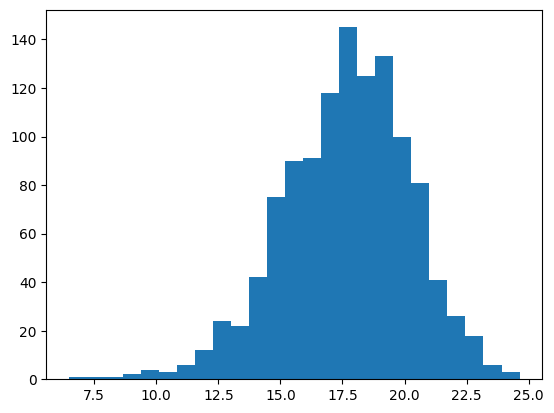

In [110]:
plt.hist(data_anls_isfinite[data_anls_colname[2]], bins=25)
